# After augmentation of the dataset

In [53]:
from tensorflow.keras.utils import image_dataset_from_directory

training_dataset = image_dataset_from_directory(
    "dataset_augmented/train/",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224,224),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    "dataset_augmented/train/",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224,224),
    batch_size=32
)

Found 5586 files belonging to 3 classes.
Using 4469 files for training.
Found 5586 files belonging to 3 classes.
Using 1117 files for validation.


In [54]:
class_names = training_dataset.class_names
print(class_names)

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS']


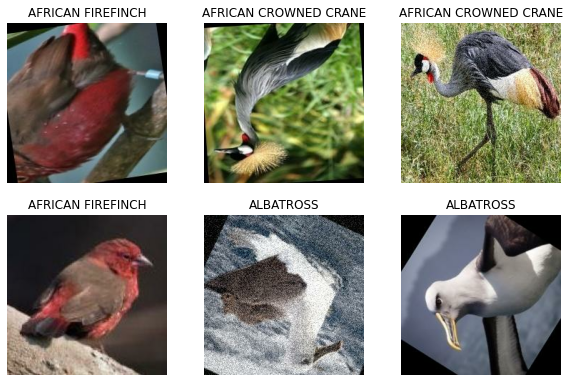

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in training_dataset.take(1):
    for i in range(6):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf

model = Sequential([
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(128, (1, 1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(3, 3)),
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(275, activation='softmax')
])
model.summary()



Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 256)     

In [57]:
model.compile(optimizer="adam", loss= tf.keras.losses.SparseCategoricalCrossentropy() , metrics=["accuracy"])

model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=4
)

Epoch 1/4
140/140 [==============================] - 10s 62ms/step - loss: 1.1282 - accuracy: 0.8174 - val_loss: 4.2068 - val_accuracy: 0.4915

## Summary
Because of a larger quantity of data the model seems to perform better. But when lookin gat the validation loss
there are signs of overfitting.


